# Pima Indians Diabetes

## Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
filename = 'diabetes.csv'
data = pd.read_csv(filename, skiprows = 0)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[:,:-1]
print(X[1:5])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [4]:
y = data['Outcome']
print(y[1:5])

1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [5]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

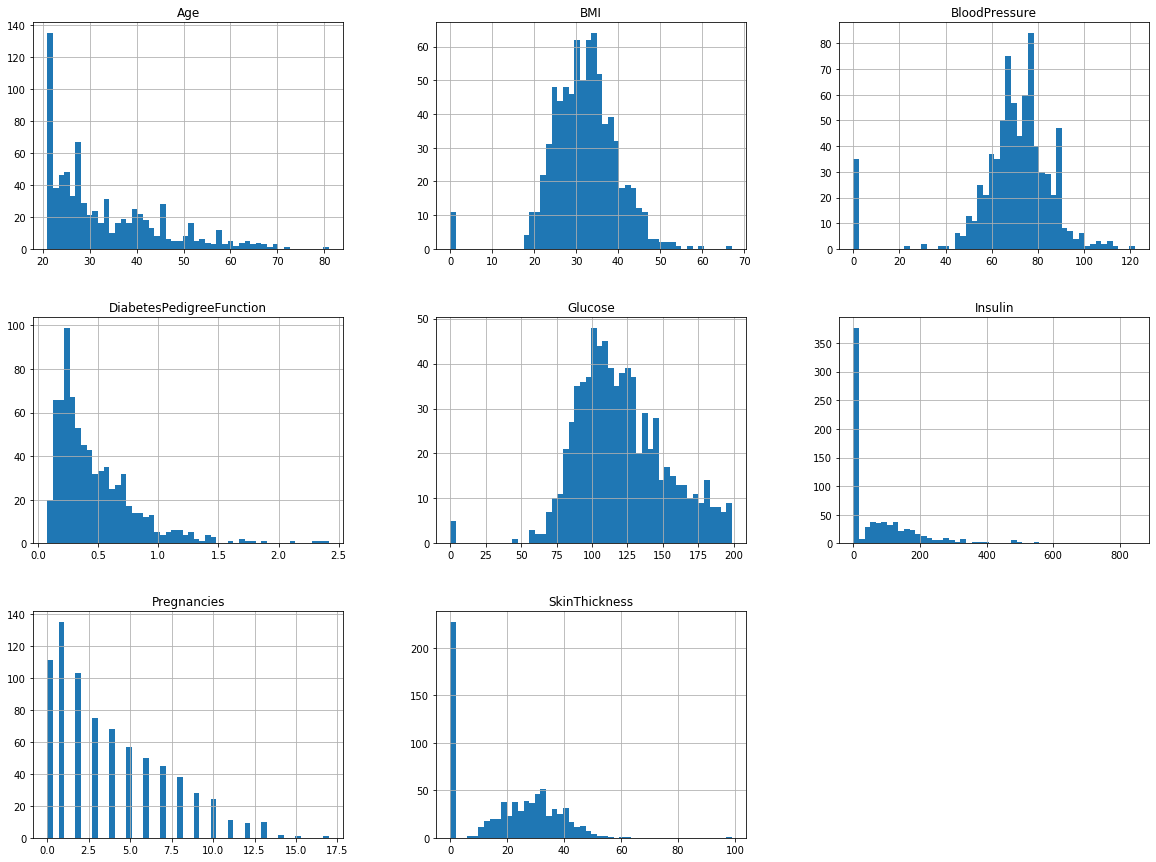

In [6]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
print(data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [8]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## Zero values indicate that there are missing values in the dataset

In [9]:
print("Number of rows with 0 values for each variable")
for col in X.columns:
    missing_rows = X.loc[X[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


## Replace 0 values with NaN

In [10]:
X['Glucose'] = X['Glucose'].replace(0, np.nan)
X['BloodPressure'] = X['BloodPressure'].replace(0, np.nan)
X['SkinThickness'] = X['SkinThickness'].replace(0, np.nan)
X['Insulin'] = X['Insulin'].replace(0, np.nan)
X['BMI'] = X['BMI'].replace(0, np.nan)

In [11]:
print("Number of rows with 0 values for each variable")
for col in X.columns:
    missing_rows = X.loc[X[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


## Replace NaN values with mean of the non-missing values

In [12]:
X['Glucose'] = X['Glucose'].fillna(X['Glucose'].mean())
X['BloodPressure'] = X['BloodPressure'].fillna(X['BloodPressure'].mean())
X['SkinThickness'] = X['SkinThickness'].fillna(X['SkinThickness'].mean())
X['Insulin'] = X['Insulin'].fillna(X['Insulin'].mean())
X['BMI'] = X['BMI'].fillna(X['BMI'].mean())

## Split data

In [13]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [14]:
y_train.value_counts()

0    279
1    153
Name: Outcome, dtype: int64

In [15]:
len(y_test)

192

## Data Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Multilayer Perceptrons (MLP)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [21]:
# function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Fine-Tuning neural network hyperparameters

In [22]:
import tensorflow as tf
#tf.__version__

In [23]:
from tensorflow import keras
#keras.__version__

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
def build_model(n_hidden=1, n_neurons=32, learning_rate=3e-3, input_shape=[8]):
    model = Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return model

In [26]:
keras_classify = KerasClassifier(build_model)

In [27]:
keras_classify.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_valid, y_valid), 
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 0.7959 - accuracy: 0.3912 - val_loss: 0.7433 - val_accuracy: 0.4722
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7850 - accuracy: 0.4120 - val_loss: 0.7333 - val_accuracy: 0.4861
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7749 - accuracy: 0.4236 - val_loss: 0.7234 - val_accuracy: 0.5000
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7649 - accuracy: 0.4514 - val_loss: 0.7141 - val_accuracy: 0.5069
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7555 - accuracy: 0.4769 - val_loss: 0.7053 - val_accuracy: 0.5278
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.4977 - val_loss: 0.6969 - val_accuracy: 0.5347
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.5093 - val_loss: 0.6887 - val_accuracy: 0.5556
Epoch 8/100


14/14 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7338 - val_loss: 0.5034 - val_accuracy: 0.7708
Epoch 59/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7361 - val_loss: 0.5018 - val_accuracy: 0.7847
Epoch 60/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7407 - val_loss: 0.5004 - val_accuracy: 0.7917
Epoch 61/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7407 - val_loss: 0.4989 - val_accuracy: 0.7917
Epoch 62/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7431 - val_loss: 0.4976 - val_accuracy: 0.7986
Epoch 63/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7454 - val_loss: 0.4963 - val_accuracy: 0.7986
Epoch 64/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7454 - val_loss: 0.4949 - val_accuracy: 0.7986
Epoch 65/100
14/14 

In [28]:
y_test_pred = keras_classify.predict(X_test)
y_test_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

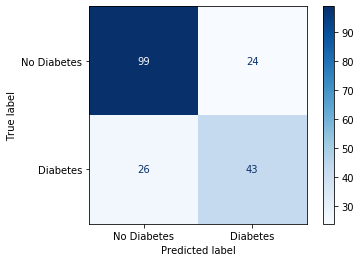

In [29]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap = 'Blues')
plt.show()

In [30]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [31]:
grid = {
    "n_hidden": [1, 2, 3, 4, 5],
    "n_neurons": np.arange(10, 100)              .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

In [32]:
search = RandomizedSearchCV(keras_classify, grid, n_iter=10, cv=5)

In [33]:
search.fit(X_train, y_train, epochs=100, 
           validation_data=(X_valid, y_valid), 
           callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
11/11 [==============================] - 0s 14ms/step - loss: 0.6782 - accuracy: 0.6464 - val_loss: 0.6707 - val_accuracy: 0.6806
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.6493 - val_loss: 0.6689 - val_accuracy: 0.6806
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.6464 - val_loss: 0.6672 - val_accuracy: 0.6806
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6464 - val_loss: 0.6656 - val_accuracy: 0.6806
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6464 - val_loss: 0.6638 - val_accuracy: 0.6806
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.6464 - val_loss: 0.6621 - val_accuracy: 0.6806
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6464 - val_loss: 0.6604 - val_accuracy: 0.6806
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6464 - val_loss: 0.5829 - val_accuracy: 0.6806
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6464 - val_loss: 0.5816 - val_accuracy: 0.6806
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6464 - val_loss: 0.5803 - val_accuracy: 0.6806
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.6464 - val_loss: 0.5790 - val_accuracy: 0.6806
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6464 - val_loss: 0.5777 - val_accuracy: 0.6806
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6464 - val_loss: 0.5764 - val_accuracy: 0.6806
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6464 - val_loss: 0.5751 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6377 - val_loss: 0.6688 - val_accuracy: 0.6806
Epoch 17/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.6348 - val_loss: 0.6678 - val_accuracy: 0.6806
Epoch 18/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6348 - val_loss: 0.6669 - val_accuracy: 0.6806
Epoch 19/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.6319 - val_loss: 0.6659 - val_accuracy: 0.6806
Epoch 20/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6290 - val_loss: 0.6650 - val_accuracy: 0.6806
Epoch 21/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6261 - val_loss: 0.6641 - val_accuracy: 0.6806
Epoch 22/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6203 - val_loss: 0.6631 - val_accuracy: 0.6806
Epoch 23/100
11/11 

Epoch 74/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6232 - val_loss: 0.6230 - val_accuracy: 0.6806
Epoch 75/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6232 - val_loss: 0.6223 - val_accuracy: 0.6806
Epoch 76/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.6232 - val_loss: 0.6216 - val_accuracy: 0.6806
Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6232 - val_loss: 0.6209 - val_accuracy: 0.6806
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.6232 - val_loss: 0.6201 - val_accuracy: 0.6806
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6232 - val_loss: 0.6194 - val_accuracy: 0.6806
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6232 - val_loss: 0.6187 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6647 - val_loss: 0.6542 - val_accuracy: 0.7083
Epoch 32/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6676 - val_loss: 0.6531 - val_accuracy: 0.7014
Epoch 33/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6676 - val_loss: 0.6519 - val_accuracy: 0.7014
Epoch 34/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.6647 - val_loss: 0.6508 - val_accuracy: 0.7014
Epoch 35/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6647 - val_loss: 0.6497 - val_accuracy: 0.7014
Epoch 36/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.6647 - val_loss: 0.6486 - val_accuracy: 0.7014
Epoch 37/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6561 - val_loss: 0.6475 - val_accuracy: 0.7153
Epoch 38/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6618 - val_loss: 0.5951 - val_accuracy: 0.7014
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6647 - val_loss: 0.5941 - val_accuracy: 0.7014
Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.6647 - val_loss: 0.5931 - val_accuracy: 0.7014
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.6647 - val_loss: 0.5921 - val_accuracy: 0.7014
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6647 - val_loss: 0.5910 - val_accuracy: 0.7083
Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.6647 - val_loss: 0.5900 - val_accuracy: 0.7083
Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.6647 - val_loss: 0.5889 - val_accuracy: 0.7083
Epoch 95/100
11/11 

11/11 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.6618 - val_loss: 0.6297 - val_accuracy: 0.6806
Epoch 46/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6348 - accuracy: 0.6618 - val_loss: 0.6288 - val_accuracy: 0.6806
Epoch 47/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.6618 - val_loss: 0.6279 - val_accuracy: 0.6806
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.6618 - val_loss: 0.6270 - val_accuracy: 0.6806
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.6618 - val_loss: 0.6261 - val_accuracy: 0.6806
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6618 - val_loss: 0.6253 - val_accuracy: 0.6806
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6618 - val_loss: 0.6244 - val_accuracy: 0.6806
Epoch 52/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6098 - val_loss: 0.6867 - val_accuracy: 0.5903
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6358 - val_loss: 0.6850 - val_accuracy: 0.6250
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6503 - val_loss: 0.6833 - val_accuracy: 0.6389
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.6705 - val_loss: 0.6817 - val_accuracy: 0.6944
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6792 - val_loss: 0.6801 - val_accuracy: 0.7083
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.6792 - val_loss: 0.6786 - val_accuracy: 0.6944
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.6792 - val_loss: 0.6771 - val_accuracy: 0.6944
Epoch 9/100
11/11 [======

Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6618 - val_loss: 0.6170 - val_accuracy: 0.6806
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6618 - val_loss: 0.6160 - val_accuracy: 0.6806
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6618 - val_loss: 0.6151 - val_accuracy: 0.6806
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.6618 - val_loss: 0.6141 - val_accuracy: 0.6806
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.6618 - val_loss: 0.6132 - val_accuracy: 0.6806
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.6618 - val_loss: 0.6122 - val_accuracy: 0.6806
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6172 - accuracy: 0.6618 - val_loss: 0.6113 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6580 - val_loss: 0.6521 - val_accuracy: 0.6806
Epoch 18/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6522 - val_loss: 0.6509 - val_accuracy: 0.6806
Epoch 19/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6522 - val_loss: 0.6496 - val_accuracy: 0.6806
Epoch 20/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6522 - val_loss: 0.6483 - val_accuracy: 0.6806
Epoch 21/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6522 - val_loss: 0.6471 - val_accuracy: 0.6806
Epoch 22/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6522 - val_loss: 0.6459 - val_accuracy: 0.6806
Epoch 23/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6522 - val_loss: 0.6447 - val_accuracy: 0.6806
Epoch 24/100
11/11 

Epoch 75/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6522 - val_loss: 0.5959 - val_accuracy: 0.6806
Epoch 76/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.6522 - val_loss: 0.5950 - val_accuracy: 0.6806
Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6522 - val_loss: 0.5942 - val_accuracy: 0.6806
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.6522 - val_loss: 0.5933 - val_accuracy: 0.6806
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6522 - val_loss: 0.5925 - val_accuracy: 0.6806
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.6522 - val_loss: 0.5916 - val_accuracy: 0.6806
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.6522 - val_loss: 0.5907 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6232 - val_loss: 0.6598 - val_accuracy: 0.6806
Epoch 33/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6232 - val_loss: 0.6589 - val_accuracy: 0.6806
Epoch 34/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.6232 - val_loss: 0.6579 - val_accuracy: 0.6806
Epoch 35/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6232 - val_loss: 0.6570 - val_accuracy: 0.6806
Epoch 36/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6232 - val_loss: 0.6561 - val_accuracy: 0.6806
Epoch 37/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6232 - val_loss: 0.6552 - val_accuracy: 0.6806
Epoch 38/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6232 - val_loss: 0.6543 - val_accuracy: 0.6806
Epoch 39/100
11/11 

Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.6232 - val_loss: 0.6151 - val_accuracy: 0.6806
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6232 - val_loss: 0.6144 - val_accuracy: 0.6806
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6232 - val_loss: 0.6137 - val_accuracy: 0.6806
Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6232 - val_loss: 0.6131 - val_accuracy: 0.6806
Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.6232 - val_loss: 0.6124 - val_accuracy: 0.6806
Epoch 95/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6232 - val_loss: 0.6117 - val_accuracy: 0.6806
Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6232 - val_loss: 0.6111 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6358 - val_loss: 0.6482 - val_accuracy: 0.6806
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6358 - val_loss: 0.6476 - val_accuracy: 0.6806
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6358 - val_loss: 0.6469 - val_accuracy: 0.6806
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6358 - val_loss: 0.6462 - val_accuracy: 0.6806
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6358 - val_loss: 0.6456 - val_accuracy: 0.6806
Epoch 52/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.6358 - val_loss: 0.6449 - val_accuracy: 0.6806
Epoch 53/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6358 - val_loss: 0.6443 - val_accuracy: 0.6806
Epoch 54/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4740 - val_loss: 0.6942 - val_accuracy: 0.5278
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5173 - val_loss: 0.6926 - val_accuracy: 0.5694
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5520 - val_loss: 0.6909 - val_accuracy: 0.5833
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5665 - val_loss: 0.6894 - val_accuracy: 0.6042
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5896 - val_loss: 0.6879 - val_accuracy: 0.6181
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6301 - val_loss: 0.6864 - val_accuracy: 0.6319
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.6561 - val_loss: 0.6849 - val_accuracy: 0.6458
Epoch 11/100
11/11 [====

Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6618 - val_loss: 0.6378 - val_accuracy: 0.6806
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.6618 - val_loss: 0.6372 - val_accuracy: 0.6806
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6618 - val_loss: 0.6365 - val_accuracy: 0.6806
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6618 - val_loss: 0.6359 - val_accuracy: 0.6806
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6618 - val_loss: 0.6353 - val_accuracy: 0.6806
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6618 - val_loss: 0.6347 - val_accuracy: 0.6806
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.6618 - val_loss: 0.6341 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.7168 - val_loss: 0.6733 - val_accuracy: 0.7153
Epoch 20/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.7139 - val_loss: 0.6721 - val_accuracy: 0.7083
Epoch 21/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.7052 - val_loss: 0.6709 - val_accuracy: 0.7083
Epoch 22/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.7023 - val_loss: 0.6698 - val_accuracy: 0.7153
Epoch 23/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.7023 - val_loss: 0.6687 - val_accuracy: 0.7222
Epoch 24/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6965 - val_loss: 0.6676 - val_accuracy: 0.7153
Epoch 25/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6879 - val_loss: 0.6666 - val_accuracy: 0.7014
Epoch 26/100
11/11 

Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6647 - val_loss: 0.6250 - val_accuracy: 0.6806
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6647 - val_loss: 0.6243 - val_accuracy: 0.6806
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6647 - val_loss: 0.6237 - val_accuracy: 0.6806
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6647 - val_loss: 0.6230 - val_accuracy: 0.6806
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6647 - val_loss: 0.6224 - val_accuracy: 0.6806
Epoch 82/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6647 - val_loss: 0.6218 - val_accuracy: 0.6806
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6647 - val_loss: 0.6211 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7275 - val_loss: 0.5462 - val_accuracy: 0.7917
Epoch 35/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.7275 - val_loss: 0.5429 - val_accuracy: 0.7917
Epoch 36/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7304 - val_loss: 0.5398 - val_accuracy: 0.7917
Epoch 37/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7333 - val_loss: 0.5367 - val_accuracy: 0.7917
Epoch 38/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7362 - val_loss: 0.5336 - val_accuracy: 0.7986
Epoch 39/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7362 - val_loss: 0.5305 - val_accuracy: 0.7986
Epoch 40/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7391 - val_loss: 0.5276 - val_accuracy: 0.7986
Epoch 41/100
11/11 

Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7507 - val_loss: 0.4484 - val_accuracy: 0.7917
Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7565 - val_loss: 0.4479 - val_accuracy: 0.7917
Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7536 - val_loss: 0.4474 - val_accuracy: 0.7917
Epoch 95/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7594 - val_loss: 0.4469 - val_accuracy: 0.7917
Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7565 - val_loss: 0.4464 - val_accuracy: 0.7917
Epoch 97/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7565 - val_loss: 0.4459 - val_accuracy: 0.7917
Epoch 98/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7565 - val_loss: 0.4455 - val_accuracy: 0.7917
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7507 - val_loss: 0.4986 - val_accuracy: 0.7847
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7507 - val_loss: 0.4967 - val_accuracy: 0.7847
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7449 - val_loss: 0.4950 - val_accuracy: 0.7847
Epoch 52/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7507 - val_loss: 0.4932 - val_accuracy: 0.7847
Epoch 53/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7536 - val_loss: 0.4917 - val_accuracy: 0.7847
Epoch 54/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7565 - val_loss: 0.4902 - val_accuracy: 0.7917
Epoch 55/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7536 - val_loss: 0.4887 - val_accuracy: 0.7917
Epoch 56/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.7023 - val_loss: 0.5802 - val_accuracy: 0.7431
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.6908 - val_loss: 0.5684 - val_accuracy: 0.7708
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.6908 - val_loss: 0.5583 - val_accuracy: 0.7847
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.6936 - val_loss: 0.5492 - val_accuracy: 0.7778
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.6908 - val_loss: 0.5413 - val_accuracy: 0.7917
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7023 - val_loss: 0.5343 - val_accuracy: 0.7778
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.7110 - val_loss: 0.5280 - val_accuracy: 0.7847
Epoch 13/100
11/11 [==

Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7832 - val_loss: 0.4448 - val_accuracy: 0.7778
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.7832 - val_loss: 0.4446 - val_accuracy: 0.7778
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.7832 - val_loss: 0.4443 - val_accuracy: 0.7778
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7803 - val_loss: 0.4440 - val_accuracy: 0.7778
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.7832 - val_loss: 0.4438 - val_accuracy: 0.7778
Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.7803 - val_loss: 0.4435 - val_accuracy: 0.7778
Epoch 70/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.7803 - val_loss: 0.4433 - val_accuracy: 0.7778
Epoch 

11/11 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.6618 - val_loss: 0.5422 - val_accuracy: 0.6806
Epoch 22/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.6618 - val_loss: 0.5393 - val_accuracy: 0.6806
Epoch 23/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.6618 - val_loss: 0.5365 - val_accuracy: 0.6806
Epoch 24/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.6618 - val_loss: 0.5337 - val_accuracy: 0.6806
Epoch 25/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.6618 - val_loss: 0.5310 - val_accuracy: 0.6806
Epoch 26/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.6618 - val_loss: 0.5285 - val_accuracy: 0.6806
Epoch 27/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.6618 - val_loss: 0.5260 - val_accuracy: 0.6806
Epoch 28/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7370 - val_loss: 0.4552 - val_accuracy: 0.7847
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7399 - val_loss: 0.4544 - val_accuracy: 0.7778
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.7457 - val_loss: 0.4536 - val_accuracy: 0.7778
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7457 - val_loss: 0.4528 - val_accuracy: 0.7778
Epoch 82/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7457 - val_loss: 0.4521 - val_accuracy: 0.7847
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.7457 - val_loss: 0.4513 - val_accuracy: 0.7847
Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7486 - val_loss: 0.4506 - val_accuracy: 0.7778
Epoch 85/100
11/11 

Epoch 35/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7254 - val_loss: 0.5600 - val_accuracy: 0.7569
Epoch 36/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7254 - val_loss: 0.5575 - val_accuracy: 0.7569
Epoch 37/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7254 - val_loss: 0.5550 - val_accuracy: 0.7569
Epoch 38/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7312 - val_loss: 0.5525 - val_accuracy: 0.7639
Epoch 39/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7341 - val_loss: 0.5500 - val_accuracy: 0.7639
Epoch 40/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7370 - val_loss: 0.5476 - val_accuracy: 0.7639
Epoch 41/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7399 - val_loss: 0.5451 - val_accuracy: 0.7708
Epoch 

Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7746 - val_loss: 0.4579 - val_accuracy: 0.8194
Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7746 - val_loss: 0.4572 - val_accuracy: 0.8194
Epoch 95/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7775 - val_loss: 0.4565 - val_accuracy: 0.8194
Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7746 - val_loss: 0.4557 - val_accuracy: 0.8194
Epoch 97/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7746 - val_loss: 0.4551 - val_accuracy: 0.8194
Epoch 98/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7775 - val_loss: 0.4544 - val_accuracy: 0.8194
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.7746 - val_loss: 0.4538 - val_accuracy: 0.8194
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7130 - val_loss: 0.5648 - val_accuracy: 0.6944
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.7130 - val_loss: 0.5638 - val_accuracy: 0.6944
Epoch 52/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7130 - val_loss: 0.5628 - val_accuracy: 0.6944
Epoch 53/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7101 - val_loss: 0.5619 - val_accuracy: 0.6944
Epoch 54/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.7130 - val_loss: 0.5609 - val_accuracy: 0.6944
Epoch 55/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7130 - val_loss: 0.5599 - val_accuracy: 0.6944
Epoch 56/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7130 - val_loss: 0.5590 - val_accuracy: 0.6944
Epoch 57/100
11/11 

Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5304 - val_loss: 0.6852 - val_accuracy: 0.5347
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5333 - val_loss: 0.6837 - val_accuracy: 0.5347
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5420 - val_loss: 0.6821 - val_accuracy: 0.5417
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5478 - val_loss: 0.6806 - val_accuracy: 0.5486
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5507 - val_loss: 0.6790 - val_accuracy: 0.5486
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5565 - val_loss: 0.6775 - val_accuracy: 0.5486
Epoch 13/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5623 - val_loss: 0.6760 - val_accuracy: 0.5556
Epoch 14/

Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6899 - val_loss: 0.6116 - val_accuracy: 0.7153
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.6928 - val_loss: 0.6106 - val_accuracy: 0.7153
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6928 - val_loss: 0.6096 - val_accuracy: 0.7153
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6899 - val_loss: 0.6086 - val_accuracy: 0.7153
Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6899 - val_loss: 0.6076 - val_accuracy: 0.7222
Epoch 70/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6899 - val_loss: 0.6066 - val_accuracy: 0.7222
Epoch 71/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.6899 - val_loss: 0.6056 - val_accuracy: 0.7222
Epoch 

Epoch 22/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6734 - val_loss: 0.6520 - val_accuracy: 0.6736
Epoch 23/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6792 - val_loss: 0.6504 - val_accuracy: 0.6806
Epoch 24/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6821 - val_loss: 0.6488 - val_accuracy: 0.6806
Epoch 25/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6879 - val_loss: 0.6472 - val_accuracy: 0.6875
Epoch 26/100
11/11 [==============================] - ETA: 0s - loss: 0.6176 - accuracy: 0.81 - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6879 - val_loss: 0.6457 - val_accuracy: 0.6806
Epoch 27/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6908 - val_loss: 0.6441 - val_accuracy: 0.6806
Epoch 28/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6908 - val_

11/11 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7486 - val_loss: 0.5824 - val_accuracy: 0.7153
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7486 - val_loss: 0.5815 - val_accuracy: 0.7153
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7486 - val_loss: 0.5806 - val_accuracy: 0.7153
Epoch 82/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7514 - val_loss: 0.5797 - val_accuracy: 0.7153
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7514 - val_loss: 0.5788 - val_accuracy: 0.7153
Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7514 - val_loss: 0.5779 - val_accuracy: 0.7153
Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7514 - val_loss: 0.5770 - val_accuracy: 0.7222
Epoch 86/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6734 - val_loss: 0.6386 - val_accuracy: 0.6389
Epoch 37/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6734 - val_loss: 0.6367 - val_accuracy: 0.6528
Epoch 38/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6734 - val_loss: 0.6349 - val_accuracy: 0.6667
Epoch 39/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6821 - val_loss: 0.6331 - val_accuracy: 0.6667
Epoch 40/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.6879 - val_loss: 0.6314 - val_accuracy: 0.6667
Epoch 41/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6936 - val_loss: 0.6296 - val_accuracy: 0.6806
Epoch 42/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6994 - val_loss: 0.6279 - val_accuracy: 0.6875
Epoch 43/100
11/11 

Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7457 - val_loss: 0.5625 - val_accuracy: 0.7361
Epoch 95/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7457 - val_loss: 0.5616 - val_accuracy: 0.7431
Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7457 - val_loss: 0.5607 - val_accuracy: 0.7431
Epoch 97/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7457 - val_loss: 0.5598 - val_accuracy: 0.7500
Epoch 98/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7428 - val_loss: 0.5589 - val_accuracy: 0.7500
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7428 - val_loss: 0.5580 - val_accuracy: 0.7500
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6103 - accuracy: 0.6279
Epoch 1/100
11/11 [==============================

11/11 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7110 - val_loss: 0.6372 - val_accuracy: 0.6806
Epoch 52/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.7110 - val_loss: 0.6362 - val_accuracy: 0.6875
Epoch 53/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7110 - val_loss: 0.6351 - val_accuracy: 0.6875
Epoch 54/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.7139 - val_loss: 0.6340 - val_accuracy: 0.6875
Epoch 55/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.7168 - val_loss: 0.6330 - val_accuracy: 0.6875
Epoch 56/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7168 - val_loss: 0.6319 - val_accuracy: 0.6875
Epoch 57/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7168 - val_loss: 0.6309 - val_accuracy: 0.6944
Epoch 58/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5159 - val_loss: 0.6903 - val_accuracy: 0.5486
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5246 - val_loss: 0.6890 - val_accuracy: 0.5278
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5420 - val_loss: 0.6876 - val_accuracy: 0.5347
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5420 - val_loss: 0.6864 - val_accuracy: 0.5347
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5681 - val_loss: 0.6851 - val_accuracy: 0.5764
Epoch 13/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5884 - val_loss: 0.6838 - val_accuracy: 0.5972
Epoch 14/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5913 - val_loss: 0.6826 - val_accuracy: 0.6111
Epoch 15/100
11/11 [

Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6464 - val_loss: 0.6312 - val_accuracy: 0.6806
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6464 - val_loss: 0.6304 - val_accuracy: 0.6806
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6464 - val_loss: 0.6295 - val_accuracy: 0.6806
Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6464 - val_loss: 0.6287 - val_accuracy: 0.6806
Epoch 70/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6464 - val_loss: 0.6279 - val_accuracy: 0.6806
Epoch 71/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.6464 - val_loss: 0.6270 - val_accuracy: 0.6806
Epoch 72/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.6464 - val_loss: 0.6262 - val_accuracy: 0.6806
Epoch 

Epoch 23/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6348 - val_loss: 0.6443 - val_accuracy: 0.6736
Epoch 24/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6319 - val_loss: 0.6433 - val_accuracy: 0.6736
Epoch 25/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6290 - val_loss: 0.6424 - val_accuracy: 0.6736
Epoch 26/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6319 - val_loss: 0.6414 - val_accuracy: 0.6736
Epoch 27/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6319 - val_loss: 0.6404 - val_accuracy: 0.6736
Epoch 28/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6319 - val_loss: 0.6394 - val_accuracy: 0.6736
Epoch 29/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.6319 - val_loss: 0.6385 - val_accuracy: 0.6736
Epoch 

Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6203 - val_loss: 0.6020 - val_accuracy: 0.6806
Epoch 82/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.6203 - val_loss: 0.6015 - val_accuracy: 0.6806
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6232 - val_loss: 0.6009 - val_accuracy: 0.6806
Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6203 - val_loss: 0.6004 - val_accuracy: 0.6806
Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6232 - val_loss: 0.5999 - val_accuracy: 0.6806
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6232 - val_loss: 0.5993 - val_accuracy: 0.6806
Epoch 87/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6232 - val_loss: 0.5988 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6358 - val_loss: 0.6441 - val_accuracy: 0.6806
Epoch 39/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6358 - val_loss: 0.6434 - val_accuracy: 0.6806
Epoch 40/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6358 - val_loss: 0.6427 - val_accuracy: 0.6806
Epoch 41/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6358 - val_loss: 0.6419 - val_accuracy: 0.6806
Epoch 42/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6358 - val_loss: 0.6412 - val_accuracy: 0.6806
Epoch 43/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6358 - val_loss: 0.6404 - val_accuracy: 0.6806
Epoch 44/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6358 - val_loss: 0.6397 - val_accuracy: 0.6806
Epoch 45/100
11/11 

Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.6358 - val_loss: 0.6051 - val_accuracy: 0.6806
Epoch 97/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6358 - val_loss: 0.6045 - val_accuracy: 0.6806
Epoch 98/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6102 - accuracy: 0.6358 - val_loss: 0.6039 - val_accuracy: 0.6806
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.6358 - val_loss: 0.6033 - val_accuracy: 0.6806
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.6860
Epoch 1/100
11/11 [==============================] - 0s 12ms/step - loss: 0.7053 - accuracy: 0.3526 - val_loss: 0.7054 - val_accuracy: 0.3681
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.3699 - val_loss: 0.7040 - val_accuracy: 0.4028
Epoch 3/100
11/11 [==============================]

11/11 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6590 - val_loss: 0.6594 - val_accuracy: 0.6667
Epoch 54/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6618 - val_loss: 0.6588 - val_accuracy: 0.6667
Epoch 55/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6618 - val_loss: 0.6583 - val_accuracy: 0.6667
Epoch 56/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6618 - val_loss: 0.6577 - val_accuracy: 0.6736
Epoch 57/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6618 - val_loss: 0.6572 - val_accuracy: 0.6736
Epoch 58/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6618 - val_loss: 0.6567 - val_accuracy: 0.6736
Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6647 - val_loss: 0.6561 - val_accuracy: 0.6736
Epoch 60/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.6156 - val_loss: 0.6813 - val_accuracy: 0.6528
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6243 - val_loss: 0.6803 - val_accuracy: 0.6597
Epoch 12/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.6272 - val_loss: 0.6793 - val_accuracy: 0.6736
Epoch 13/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.6243 - val_loss: 0.6783 - val_accuracy: 0.6875
Epoch 14/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.6214 - val_loss: 0.6774 - val_accuracy: 0.6944
Epoch 15/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6272 - val_loss: 0.6764 - val_accuracy: 0.6875
Epoch 16/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6301 - val_loss: 0.6755 - val_accuracy: 0.7014
Epoch 17/100
11/11 

Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6618 - val_loss: 0.6432 - val_accuracy: 0.6806
Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.6618 - val_loss: 0.6428 - val_accuracy: 0.6806
Epoch 70/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6618 - val_loss: 0.6424 - val_accuracy: 0.6806
Epoch 71/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6618 - val_loss: 0.6419 - val_accuracy: 0.6806
Epoch 72/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6618 - val_loss: 0.6415 - val_accuracy: 0.6806
Epoch 73/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6618 - val_loss: 0.6411 - val_accuracy: 0.6806
Epoch 74/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6618 - val_loss: 0.6407 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6609 - val_loss: 0.6038 - val_accuracy: 0.7014
Epoch 26/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.6609 - val_loss: 0.6021 - val_accuracy: 0.7014
Epoch 27/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.6609 - val_loss: 0.6004 - val_accuracy: 0.7014
Epoch 28/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.6580 - val_loss: 0.5987 - val_accuracy: 0.7014
Epoch 29/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.6580 - val_loss: 0.5971 - val_accuracy: 0.6944
Epoch 30/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.6580 - val_loss: 0.5955 - val_accuracy: 0.6944
Epoch 31/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.6580 - val_loss: 0.5939 - val_accuracy: 0.6944
Epoch 32/100
11/11 

Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7391 - val_loss: 0.5233 - val_accuracy: 0.7569
Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7391 - val_loss: 0.5221 - val_accuracy: 0.7569
Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7391 - val_loss: 0.5209 - val_accuracy: 0.7569
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7391 - val_loss: 0.5198 - val_accuracy: 0.7569
Epoch 87/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7449 - val_loss: 0.5186 - val_accuracy: 0.7569
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7449 - val_loss: 0.5175 - val_accuracy: 0.7569
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7449 - val_loss: 0.5164 - val_accuracy: 0.7569
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6725 - val_loss: 0.5927 - val_accuracy: 0.7222
Epoch 41/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6754 - val_loss: 0.5912 - val_accuracy: 0.7222
Epoch 42/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.6754 - val_loss: 0.5897 - val_accuracy: 0.7222
Epoch 43/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.6783 - val_loss: 0.5883 - val_accuracy: 0.7222
Epoch 44/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.6812 - val_loss: 0.5868 - val_accuracy: 0.7222
Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.6841 - val_loss: 0.5854 - val_accuracy: 0.7222
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6841 - val_loss: 0.5839 - val_accuracy: 0.7222
Epoch 47/100
11/11 

Epoch 98/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7101 - val_loss: 0.5189 - val_accuracy: 0.7500
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7159 - val_loss: 0.5179 - val_accuracy: 0.7500
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8506
Epoch 1/100
11/11 [==============================] - 0s 11ms/step - loss: 0.7186 - accuracy: 0.3266 - val_loss: 0.7123 - val_accuracy: 0.3542
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.3526 - val_loss: 0.7072 - val_accuracy: 0.3958
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.3671 - val_loss: 0.7025 - val_accuracy: 0.4236
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.3671 - val_loss: 0.6981 - val_accuracy: 0.4375
Epoch 5/100
11/11 [==============================] -

11/11 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6358 - val_loss: 0.5990 - val_accuracy: 0.6806
Epoch 56/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6358 - val_loss: 0.5978 - val_accuracy: 0.6806
Epoch 57/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6358 - val_loss: 0.5966 - val_accuracy: 0.6806
Epoch 58/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6358 - val_loss: 0.5954 - val_accuracy: 0.6806
Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6358 - val_loss: 0.5942 - val_accuracy: 0.6806
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6358 - val_loss: 0.5930 - val_accuracy: 0.6806
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6358 - val_loss: 0.5918 - val_accuracy: 0.6806
Epoch 62/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6618 - val_loss: 0.6492 - val_accuracy: 0.6806
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6618 - val_loss: 0.6474 - val_accuracy: 0.6806
Epoch 13/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.6618 - val_loss: 0.6457 - val_accuracy: 0.6806
Epoch 14/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.6618 - val_loss: 0.6440 - val_accuracy: 0.6806
Epoch 15/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6618 - val_loss: 0.6423 - val_accuracy: 0.6806
Epoch 16/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6618 - val_loss: 0.6406 - val_accuracy: 0.6806
Epoch 17/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6618 - val_loss: 0.6389 - val_accuracy: 0.6806
Epoch 18/100
11/11 

Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.6618 - val_loss: 0.5729 - val_accuracy: 0.6806
Epoch 70/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.6618 - val_loss: 0.5717 - val_accuracy: 0.6806
Epoch 71/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.6618 - val_loss: 0.5705 - val_accuracy: 0.6806
Epoch 72/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6618 - val_loss: 0.5693 - val_accuracy: 0.6806
Epoch 73/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.6618 - val_loss: 0.5681 - val_accuracy: 0.6806
Epoch 74/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6618 - val_loss: 0.5668 - val_accuracy: 0.6806
Epoch 75/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.6618 - val_loss: 0.5656 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7052 - val_loss: 0.5758 - val_accuracy: 0.6944
Epoch 27/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7023 - val_loss: 0.5733 - val_accuracy: 0.6944
Epoch 28/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.7023 - val_loss: 0.5708 - val_accuracy: 0.6944
Epoch 29/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.7081 - val_loss: 0.5684 - val_accuracy: 0.6944
Epoch 30/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7081 - val_loss: 0.5660 - val_accuracy: 0.6944
Epoch 31/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7081 - val_loss: 0.5637 - val_accuracy: 0.6944
Epoch 32/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7081 - val_loss: 0.5613 - val_accuracy: 0.7014
Epoch 33/100
11/11 

Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7572 - val_loss: 0.4780 - val_accuracy: 0.7847
Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7601 - val_loss: 0.4769 - val_accuracy: 0.7847
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7601 - val_loss: 0.4759 - val_accuracy: 0.7708
Epoch 87/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7601 - val_loss: 0.4749 - val_accuracy: 0.7708
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7601 - val_loss: 0.4738 - val_accuracy: 0.7778
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7630 - val_loss: 0.4728 - val_accuracy: 0.7778
Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7630 - val_loss: 0.4718 - val_accuracy: 0.7778
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.7826 - val_loss: 0.4501 - val_accuracy: 0.7500
Epoch 42/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.7826 - val_loss: 0.4500 - val_accuracy: 0.7500
Epoch 43/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.7855 - val_loss: 0.4499 - val_accuracy: 0.7500
Epoch 44/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.7826 - val_loss: 0.4498 - val_accuracy: 0.7500
Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.7855 - val_loss: 0.4499 - val_accuracy: 0.7569
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.7855 - val_loss: 0.4501 - val_accuracy: 0.7569
Epoch 47/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7826 - val_loss: 0.4502 - val_accuracy: 0.7569
Epoch 48/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7768 - val_loss: 0.4422 - val_accuracy: 0.7639
Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7739 - val_loss: 0.4416 - val_accuracy: 0.7708
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.7710 - val_loss: 0.4412 - val_accuracy: 0.7708
Epoch 47/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7739 - val_loss: 0.4407 - val_accuracy: 0.7708
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.7768 - val_loss: 0.4402 - val_accuracy: 0.7778
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7768 - val_loss: 0.4397 - val_accuracy: 0.7778
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7797 - val_loss: 0.4393 - val_accuracy: 0.7778
Epoch 51/100
11/11 

11/11 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7168 - val_loss: 0.5483 - val_accuracy: 0.7500
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7283 - val_loss: 0.5337 - val_accuracy: 0.7639
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7312 - val_loss: 0.5210 - val_accuracy: 0.7708
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7283 - val_loss: 0.5101 - val_accuracy: 0.7847
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7312 - val_loss: 0.5003 - val_accuracy: 0.8056
Epoch 13/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7399 - val_loss: 0.4916 - val_accuracy: 0.8056
Epoch 14/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7486 - val_loss: 0.4841 - val_accuracy: 0.8125
Epoch 15/100
11/11 [

Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.7890 - val_loss: 0.4218 - val_accuracy: 0.8194
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.7948 - val_loss: 0.4218 - val_accuracy: 0.8194
Epoch 68/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7558
Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7820 - accuracy: 0.4133 - val_loss: 0.7280 - val_accuracy: 0.4653
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.5260 - val_loss: 0.6737 - val_accuracy: 0.5764
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.5723 - val_loss: 0.6324 - val_accuracy: 0.6181
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6474 - val_loss: 0.6002 - val_accuracy: 0.6667
Epoch 5/100
11/11 [==============================] - 

11/11 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8121 - val_loss: 0.4228 - val_accuracy: 0.7847
Epoch 56/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8121 - val_loss: 0.4228 - val_accuracy: 0.7917
Epoch 57/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8121 - val_loss: 0.4227 - val_accuracy: 0.7917
Epoch 58/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8121 - val_loss: 0.4227 - val_accuracy: 0.7917
Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8121 - val_loss: 0.4227 - val_accuracy: 0.7917
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8121 - val_loss: 0.4226 - val_accuracy: 0.7917
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8121 - val_loss: 0.4228 - val_accuracy: 0.7917
Epoch 62/100
11/11 

Epoch 42/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7717 - val_loss: 0.4591 - val_accuracy: 0.7639
Epoch 43/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7746 - val_loss: 0.4588 - val_accuracy: 0.7639
Epoch 44/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.7775 - val_loss: 0.4585 - val_accuracy: 0.7639
Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7775 - val_loss: 0.4583 - val_accuracy: 0.7639
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7775 - val_loss: 0.4580 - val_accuracy: 0.7639
Epoch 47/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7746 - val_loss: 0.4576 - val_accuracy: 0.7639
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7775 - val_loss: 0.4575 - val_accuracy: 0.7639
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.6522 - val_loss: 0.6669 - val_accuracy: 0.7153
Epoch 28/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6464 - val_loss: 0.6659 - val_accuracy: 0.7083
Epoch 29/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6377 - val_loss: 0.6649 - val_accuracy: 0.6944
Epoch 30/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6406 - val_loss: 0.6640 - val_accuracy: 0.6875
Epoch 31/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6406 - val_loss: 0.6630 - val_accuracy: 0.6875
Epoch 32/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6464 - val_loss: 0.6621 - val_accuracy: 0.6875
Epoch 33/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6464 - val_loss: 0.6611 - val_accuracy: 0.6875
Epoch 34/100
11/11 

Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6464 - val_loss: 0.6235 - val_accuracy: 0.6806
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6464 - val_loss: 0.6228 - val_accuracy: 0.6806
Epoch 87/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6464 - val_loss: 0.6222 - val_accuracy: 0.6806
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6464 - val_loss: 0.6216 - val_accuracy: 0.6806
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.6464 - val_loss: 0.6210 - val_accuracy: 0.6806
Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.6464 - val_loss: 0.6204 - val_accuracy: 0.6806
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6464 - val_loss: 0.6198 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.7072 - val_loss: 0.6515 - val_accuracy: 0.7292
Epoch 43/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.7014 - val_loss: 0.6505 - val_accuracy: 0.7292
Epoch 44/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6986 - val_loss: 0.6496 - val_accuracy: 0.7292
Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6986 - val_loss: 0.6487 - val_accuracy: 0.7292
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6928 - val_loss: 0.6478 - val_accuracy: 0.7222
Epoch 47/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6870 - val_loss: 0.6469 - val_accuracy: 0.7153
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6899 - val_loss: 0.6460 - val_accuracy: 0.7153
Epoch 49/100
11/11 

Epoch 100/100
3/3 [==============================] - 0s 997us/step - loss: 0.5820 - accuracy: 0.8276
Epoch 1/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6846 - accuracy: 0.5896 - val_loss: 0.6826 - val_accuracy: 0.6597
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5983 - val_loss: 0.6816 - val_accuracy: 0.6806
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6098 - val_loss: 0.6806 - val_accuracy: 0.6806
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.6214 - val_loss: 0.6796 - val_accuracy: 0.6806
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6329 - val_loss: 0.6786 - val_accuracy: 0.6806
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6329 - val_loss: 0.6776 - val_accuracy: 0.6875
Epoch 7/100
11/11 [==============================] -

11/11 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6358 - val_loss: 0.6380 - val_accuracy: 0.6806
Epoch 58/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6358 - val_loss: 0.6374 - val_accuracy: 0.6806
Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6358 - val_loss: 0.6367 - val_accuracy: 0.6806
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6358 - val_loss: 0.6361 - val_accuracy: 0.6806
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6358 - val_loss: 0.6354 - val_accuracy: 0.6806
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6358 - val_loss: 0.6348 - val_accuracy: 0.6806
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6358 - val_loss: 0.6342 - val_accuracy: 0.6806
Epoch 64/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6705 - val_loss: 0.6809 - val_accuracy: 0.6875
Epoch 15/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.6676 - val_loss: 0.6801 - val_accuracy: 0.6875
Epoch 16/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6647 - val_loss: 0.6792 - val_accuracy: 0.6875
Epoch 17/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6676 - val_loss: 0.6784 - val_accuracy: 0.6875
Epoch 18/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6647 - val_loss: 0.6776 - val_accuracy: 0.6875
Epoch 19/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6618 - val_loss: 0.6768 - val_accuracy: 0.6875
Epoch 20/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6618 - val_loss: 0.6760 - val_accuracy: 0.6875
Epoch 21/100
11/11 

Epoch 72/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6618 - val_loss: 0.6441 - val_accuracy: 0.6806
Epoch 73/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6618 - val_loss: 0.6436 - val_accuracy: 0.6806
Epoch 74/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6618 - val_loss: 0.6430 - val_accuracy: 0.6806
Epoch 75/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.6618 - val_loss: 0.6425 - val_accuracy: 0.6806
Epoch 76/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6618 - val_loss: 0.6420 - val_accuracy: 0.6806
Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6618 - val_loss: 0.6415 - val_accuracy: 0.6806
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6618 - val_loss: 0.6409 - val_accuracy: 0.6806
Epoch 

Epoch 29/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6647 - val_loss: 0.6456 - val_accuracy: 0.6806
Epoch 30/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6647 - val_loss: 0.6444 - val_accuracy: 0.6806
Epoch 31/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6647 - val_loss: 0.6431 - val_accuracy: 0.6806
Epoch 32/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6647 - val_loss: 0.6419 - val_accuracy: 0.6806
Epoch 33/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6647 - val_loss: 0.6407 - val_accuracy: 0.6806
Epoch 34/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6647 - val_loss: 0.6395 - val_accuracy: 0.6806
Epoch 35/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6647 - val_loss: 0.6383 - val_accuracy: 0.6806
Epoch 

Epoch 87/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.6647 - val_loss: 0.5901 - val_accuracy: 0.6806
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6647 - val_loss: 0.5892 - val_accuracy: 0.6806
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6647 - val_loss: 0.5884 - val_accuracy: 0.6806
Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.6647 - val_loss: 0.5876 - val_accuracy: 0.6806
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6647 - val_loss: 0.5868 - val_accuracy: 0.6806
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.6647 - val_loss: 0.5860 - val_accuracy: 0.6806
Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.6647 - val_loss: 0.5852 - val_accuracy: 0.6806
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6464 - val_loss: 0.6345 - val_accuracy: 0.6806
Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6464 - val_loss: 0.6337 - val_accuracy: 0.6806
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6464 - val_loss: 0.6330 - val_accuracy: 0.6806
Epoch 47/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6464 - val_loss: 0.6322 - val_accuracy: 0.6806
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6464 - val_loss: 0.6315 - val_accuracy: 0.6806
Epoch 49/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6464 - val_loss: 0.6307 - val_accuracy: 0.6806
Epoch 50/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.6464 - val_loss: 0.6300 - val_accuracy: 0.6806
Epoch 51/100
11/11 

3/3 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.6437
Epoch 1/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6901 - accuracy: 0.5594 - val_loss: 0.6915 - val_accuracy: 0.5764
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5913 - val_loss: 0.6900 - val_accuracy: 0.6042
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6029 - val_loss: 0.6886 - val_accuracy: 0.6111
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.6145 - val_loss: 0.6872 - val_accuracy: 0.6389
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.6203 - val_loss: 0.6859 - val_accuracy: 0.6736
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6319 - val_loss: 0.6845 - val_accuracy: 0.6667
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - l

11/11 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6232 - val_loss: 0.6449 - val_accuracy: 0.6806
Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.6232 - val_loss: 0.6444 - val_accuracy: 0.6806
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6232 - val_loss: 0.6439 - val_accuracy: 0.6806
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.6232 - val_loss: 0.6435 - val_accuracy: 0.6806
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6232 - val_loss: 0.6430 - val_accuracy: 0.6806
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6232 - val_loss: 0.6426 - val_accuracy: 0.6806
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6232 - val_loss: 0.6421 - val_accuracy: 0.6806
Epoch 65/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6532 - val_loss: 0.6571 - val_accuracy: 0.6875
Epoch 16/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6474 - val_loss: 0.6552 - val_accuracy: 0.6875
Epoch 17/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6474 - val_loss: 0.6532 - val_accuracy: 0.6944
Epoch 18/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6474 - val_loss: 0.6514 - val_accuracy: 0.7014
Epoch 19/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6474 - val_loss: 0.6496 - val_accuracy: 0.7014
Epoch 20/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6445 - val_loss: 0.6478 - val_accuracy: 0.7014
Epoch 21/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6445 - val_loss: 0.6459 - val_accuracy: 0.7014
Epoch 22/100
11/11 

Epoch 73/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.6734 - val_loss: 0.5760 - val_accuracy: 0.7222
Epoch 74/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.6734 - val_loss: 0.5747 - val_accuracy: 0.7292
Epoch 75/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.6734 - val_loss: 0.5734 - val_accuracy: 0.7292
Epoch 76/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.6734 - val_loss: 0.5721 - val_accuracy: 0.7292
Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6763 - val_loss: 0.5708 - val_accuracy: 0.7292
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.6763 - val_loss: 0.5694 - val_accuracy: 0.7222
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.6792 - val_loss: 0.5680 - val_accuracy: 0.7222
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6618 - val_loss: 0.6180 - val_accuracy: 0.6806
Epoch 31/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.6618 - val_loss: 0.6165 - val_accuracy: 0.6806
Epoch 32/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.6618 - val_loss: 0.6149 - val_accuracy: 0.6806
Epoch 33/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.6618 - val_loss: 0.6133 - val_accuracy: 0.6806
Epoch 34/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.6618 - val_loss: 0.6118 - val_accuracy: 0.6806
Epoch 35/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.6618 - val_loss: 0.6102 - val_accuracy: 0.6806
Epoch 36/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.6618 - val_loss: 0.6087 - val_accuracy: 0.6806
Epoch 37/100
11/11 

Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7572 - val_loss: 0.5274 - val_accuracy: 0.7778
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7572 - val_loss: 0.5259 - val_accuracy: 0.7778
Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7601 - val_loss: 0.5244 - val_accuracy: 0.7778
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7630 - val_loss: 0.5230 - val_accuracy: 0.7778
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7659 - val_loss: 0.5215 - val_accuracy: 0.7847
Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7659 - val_loss: 0.5201 - val_accuracy: 0.7847
Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7630 - val_loss: 0.5187 - val_accuracy: 0.7847
Epoch 

Epoch 45/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6994 - val_loss: 0.6132 - val_accuracy: 0.7014
Epoch 46/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.6994 - val_loss: 0.6119 - val_accuracy: 0.7014
Epoch 47/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6994 - val_loss: 0.6106 - val_accuracy: 0.7014
Epoch 48/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.6994 - val_loss: 0.6093 - val_accuracy: 0.7014
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7023 - val_loss: 0.6080 - val_accuracy: 0.7014
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.6994 - val_loss: 0.6067 - val_accuracy: 0.7014
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.6994 - val_loss: 0.6055 - val_accuracy: 0.6944
Epoch 

Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5739 - val_loss: 0.6881 - val_accuracy: 0.5625
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5739 - val_loss: 0.6877 - val_accuracy: 0.5625
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5768 - val_loss: 0.6872 - val_accuracy: 0.5625
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5826 - val_loss: 0.6868 - val_accuracy: 0.5764
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5797 - val_loss: 0.6864 - val_accuracy: 0.5833
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5797 - val_loss: 0.6859 - val_accuracy: 0.5764
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5797 - val_loss: 0.6855 - val_accuracy: 0.5764
Epoch 9/100
1

Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6464 - val_loss: 0.6659 - val_accuracy: 0.6736
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6464 - val_loss: 0.6655 - val_accuracy: 0.6736
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6464 - val_loss: 0.6652 - val_accuracy: 0.6736
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6464 - val_loss: 0.6648 - val_accuracy: 0.6736
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6464 - val_loss: 0.6645 - val_accuracy: 0.6736
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6464 - val_loss: 0.6642 - val_accuracy: 0.6736
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6464 - val_loss: 0.6638 - val_accuracy: 0.6736
Epoch 

Epoch 17/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.6203 - val_loss: 0.6805 - val_accuracy: 0.6667
Epoch 18/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.6232 - val_loss: 0.6803 - val_accuracy: 0.6667
Epoch 19/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6232 - val_loss: 0.6800 - val_accuracy: 0.6597
Epoch 20/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6232 - val_loss: 0.6797 - val_accuracy: 0.6667
Epoch 21/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6203 - val_loss: 0.6795 - val_accuracy: 0.6667
Epoch 22/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6203 - val_loss: 0.6792 - val_accuracy: 0.6667
Epoch 23/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.6203 - val_loss: 0.6790 - val_accuracy: 0.6597
Epoch 

Epoch 75/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.6232 - val_loss: 0.6664 - val_accuracy: 0.6736
Epoch 76/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6232 - val_loss: 0.6662 - val_accuracy: 0.6736
Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6232 - val_loss: 0.6659 - val_accuracy: 0.6736
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6232 - val_loss: 0.6657 - val_accuracy: 0.6736
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6232 - val_loss: 0.6655 - val_accuracy: 0.6736
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6232 - val_loss: 0.6652 - val_accuracy: 0.6736
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.6232 - val_loss: 0.6650 - val_accuracy: 0.6736
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.6301 - val_loss: 0.6822 - val_accuracy: 0.6458
Epoch 33/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6301 - val_loss: 0.6818 - val_accuracy: 0.6597
Epoch 34/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6358 - val_loss: 0.6814 - val_accuracy: 0.6736
Epoch 35/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.6416 - val_loss: 0.6810 - val_accuracy: 0.6806
Epoch 36/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.6358 - val_loss: 0.6805 - val_accuracy: 0.6736
Epoch 37/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.6329 - val_loss: 0.6801 - val_accuracy: 0.6736
Epoch 38/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.6329 - val_loss: 0.6797 - val_accuracy: 0.6597
Epoch 39/100
11/11 

Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.6416 - val_loss: 0.6604 - val_accuracy: 0.6806
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6416 - val_loss: 0.6600 - val_accuracy: 0.6806
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6416 - val_loss: 0.6597 - val_accuracy: 0.6736
Epoch 93/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.6416 - val_loss: 0.6594 - val_accuracy: 0.6736
Epoch 94/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6416 - val_loss: 0.6590 - val_accuracy: 0.6736
Epoch 95/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.6416 - val_loss: 0.6587 - val_accuracy: 0.6736
Epoch 96/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6416 - val_loss: 0.6584 - val_accuracy: 0.6736
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.6618 - val_loss: 0.6645 - val_accuracy: 0.6806
Epoch 48/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6618 - val_loss: 0.6640 - val_accuracy: 0.6806
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6618 - val_loss: 0.6635 - val_accuracy: 0.6806
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6618 - val_loss: 0.6630 - val_accuracy: 0.6806
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6618 - val_loss: 0.6626 - val_accuracy: 0.6806
Epoch 52/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6618 - val_loss: 0.6621 - val_accuracy: 0.6806
Epoch 53/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6618 - val_loss: 0.6617 - val_accuracy: 0.6806
Epoch 54/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.3873 - val_loss: 0.6984 - val_accuracy: 0.4167
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.3960 - val_loss: 0.6978 - val_accuracy: 0.4375
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4046 - val_loss: 0.6973 - val_accuracy: 0.4444
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4046 - val_loss: 0.6968 - val_accuracy: 0.4514
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.3988 - val_loss: 0.6963 - val_accuracy: 0.4792
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4075 - val_loss: 0.6958 - val_accuracy: 0.4931
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4277 - val_loss: 0.6953 - val_accuracy: 0.5069
Epoch 11/100
11/11 [====

Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6532 - val_loss: 0.6738 - val_accuracy: 0.7083
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6561 - val_loss: 0.6735 - val_accuracy: 0.7083
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.6474 - val_loss: 0.6731 - val_accuracy: 0.7153
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6474 - val_loss: 0.6728 - val_accuracy: 0.7222
Epoch 66/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.6503 - val_loss: 0.6725 - val_accuracy: 0.7222
Epoch 67/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.6532 - val_loss: 0.6721 - val_accuracy: 0.7222
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6532 - val_loss: 0.6718 - val_accuracy: 0.7153
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7731 - val_loss: 0.4448 - val_accuracy: 0.8194
Epoch 20/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.7778 - val_loss: 0.4428 - val_accuracy: 0.8194
Epoch 21/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7778 - val_loss: 0.4409 - val_accuracy: 0.8125
Epoch 22/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7778 - val_loss: 0.4393 - val_accuracy: 0.8125
Epoch 23/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7778 - val_loss: 0.4380 - val_accuracy: 0.8125
Epoch 24/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7778 - val_loss: 0.4358 - val_accuracy: 0.8125
Epoch 25/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.7778 - val_loss: 0.4346 - val_accuracy: 0.8194
Epoch 26/100
14/14 

Epoch 77/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.7986 - val_loss: 0.4219 - val_accuracy: 0.7917


RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E5D08CDF88>,
                   param_distributions={'learning_rate': [0.00037927894382536366,
                                                          0.0053649304078062345,
                                                          0.002027951293944021,
                                                          0.0013441895980922374,
                                                          0.0013081718410672422,
                                                          0.006734036036150314,
                                                          0.000515151285063753,
                                                          0.0003788624090913953,
                                                          0.000536609582538483,
                                                          0.000344382...
                                                          0.00093764523

In [34]:
search.best_params_

{'n_neurons': 28, 'n_hidden': 1, 'learning_rate': 0.02215376383026519}

## Classification performance

In [35]:
y_test_pred = search.predict(X_test)

In [36]:
score = accuracy_score(y_test_pred, y_test)
print('Score: ' + str(score))

Score: 0.7552083333333334


In [37]:
recall_score(y_test, y_test_pred, pos_label=1)

0.6521739130434783

In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       123
           1       0.66      0.65      0.66        69

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



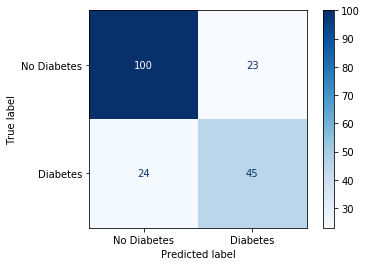

In [39]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap = 'Blues')
plt.show()

## ROC Curve

In [40]:
y_test_pred_probs = search.predict_proba(X_test)[:,1]

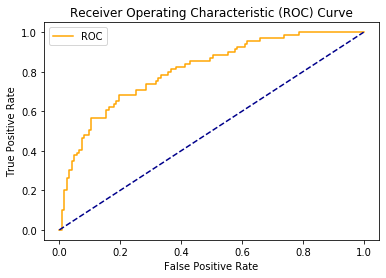

In [41]:
FPR, TPR, thresholds = roc_curve(y_test, y_test_pred_probs)
plot_roc_curve(FPR, TPR)

In [42]:
auc = roc_auc_score(y_test, y_test_pred_probs)
print('AUC: %.2f' % auc)

AUC: 0.81
